<font size=5> Personalization and Machine Learning: Assignment 1 

<font size=4> By Marissa Beaty

For this assignment, I have selected to look deeper at Task 3 and 4. All code for these tasks are within this notebook. The analysis of these experiments are within a word document titled "Assignment 1 Report." 

<font size=5> Setting up the notebook

In [52]:
## Install library 
!pip install spotipy


[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: pip install --upgrade pip


In [53]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [54]:
##These relate to an App on my developer account at Spotify and are used for authentication 
SPOTIPY_CLIENT_ID= 
SPOTIPY_CLIENT_SECRET= 

In [55]:
##First we authenticate
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(SPOTIPY_CLIENT_ID,SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

<font size = 5> Pick a Playlist

In [56]:
#ID of my playlist titled "An Anthology of my Favorite Songs"
playlist_id = '0Ftn9jR4tXVw0TN52aqx93'

In [57]:
#setting the limit (basically creating the size of my dataset)
limit = 50 
trim = True

In [58]:
#Get playlsit
playlist = sp.playlist(playlist_id)
#Extract tracks
tracks = playlist["tracks"]["items"]
if trim:
    tracks = tracks[-limit:]
#Extract track IDs
ids = [track["track"]["id"] for track in tracks]
#Get audio features for tracks
features =  pd.DataFrame(sp.audio_features(ids))    
#Label dataframe rows with track name and artist
labels = [track["track"]["artists"][0]["name"] + " - "+ track["track"]["name"] for track in tracks]
features.index = labels

In [59]:
#get a look at the dataset
features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
Gabrielle Aplin - Letting You Go,0.667,0.6210,2,-8.032,1,0.0712,0.342000,0.000000,0.1160,0.2880,122.017,audio_features,5Co1LV1AEBqm9G4k68ZxUD,spotify:track:5Co1LV1AEBqm9G4k68ZxUD,https://api.spotify.com/v1/tracks/5Co1LV1AEBqm...,https://api.spotify.com/v1/audio-analysis/5Co1...,189387,4
Gabrielle Aplin - Strange,0.736,0.6440,5,-7.022,0,0.0624,0.080100,0.000024,0.0606,0.7950,104.951,audio_features,2mqBua6233AQvzJ87D413s,spotify:track:2mqBua6233AQvzJ87D413s,https://api.spotify.com/v1/tracks/2mqBua6233AQ...,https://api.spotify.com/v1/audio-analysis/2mqB...,163373,4
Gabrielle Aplin - Miss You,0.592,0.6860,9,-6.904,1,0.0389,0.178000,0.000000,0.1110,0.3950,101.023,audio_features,08LUGrU5LE8OBmVHewRjsC,spotify:track:08LUGrU5LE8OBmVHewRjsC,https://api.spotify.com/v1/tracks/08LUGrU5LE8O...,https://api.spotify.com/v1/audio-analysis/08LU...,197547,4
Little Big Town - Girl Crush,0.500,0.2250,0,-10.220,1,0.0302,0.842000,0.000000,0.1120,0.3550,173.788,audio_features,11qh54D0PKkBwelpDxxiEU,spotify:track:11qh54D0PKkBwelpDxxiEU,https://api.spotify.com/v1/tracks/11qh54D0PKkB...,https://api.spotify.com/v1/audio-analysis/11qh...,193320,3
Maren Morris - Nervous,0.414,0.6900,7,-6.917,1,0.0355,0.004590,0.000000,0.0761,0.1860,171.981,audio_features,7LrF8C77PkYtm4D8JpuKnJ,spotify:track:7LrF8C77PkYtm4D8JpuKnJ,https://api.spotify.com/v1/tracks/7LrF8C77PkYt...,https://api.spotify.com/v1/audio-analysis/7LrF...,175213,4
Brooks & Dunn - Ain't Nothing 'Bout You - with Brett Young,0.676,0.7530,8,-6.239,0,0.0252,0.095700,0.000000,0.3620,0.7720,96.993,audio_features,2BPiamp7M8ARGtxjNyTZWf,spotify:track:2BPiamp7M8ARGtxjNyTZWf,https://api.spotify.com/v1/tracks/2BPiamp7M8AR...,https://api.spotify.com/v1/audio-analysis/2BPi...,241093,4
Doja Cat - Vegas (From the Original Motion Picture Soundtrack ELVIS),0.801,0.6010,8,-7.574,0,0.2550,0.077700,0.000032,0.1450,0.7400,159.969,audio_features,0hquQWY3xvYqN4qtiquniF,spotify:track:0hquQWY3xvYqN4qtiquniF,https://api.spotify.com/v1/tracks/0hquQWY3xvYq...,https://api.spotify.com/v1/audio-analysis/0hqu...,182907,4
Kevin Garrett - Tell You How I'm Feeling,0.729,0.5170,6,-7.281,0,0.1100,0.415000,0.000548,0.0952,0.4510,139.951,audio_features,2Bg9zUDkwUjwFbNw0D2ycD,spotify:track:2Bg9zUDkwUjwFbNw0D2ycD,https://api.spotify.com/v1/tracks/2Bg9zUDkwUjw...,https://api.spotify.com/v1/audio-analysis/2Bg9...,159080,4
Kevin Garrett - Why Don't You,0.698,0.5930,3,-6.463,1,0.1560,0.147000,0.003580,0.1170,0.6800,167.826,audio_features,0RwC4DLbs7V0fVFJAYuTmA,spotify:track:0RwC4DLbs7V0fVFJAYuTmA,https://api.spotify.com/v1/tracks/0RwC4DLbs7V0...,https://api.spotify.com/v1/audio-analysis/0RwC...,220933,4
Kevin Garrett - How Dare We Fall,0.514,0.3660,3,-7.841,0,0.1690,0.298000,0.000000,0.2180,0.3000,75.523,audio_features,312z9a8ptGzWr33lEKqt0P,spotify:track:312z9a8ptGzWr33lEKqt0P,https://api.spotify.com/v1/tracks/312z9a8ptGzW...,https://api.spotify.com/v1/audio-analysis/312z...,238173,4


<font size = 5> Audio Features

What audio features do we get? You can check out the [Spotify API Documentation](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features)

Some relate to known musical features such as ``key``, ``mode``,``tempo`` and ``time_signature``. 

Some are more related to the signal of the audio file itself (``loudness``, ``duration_ms``).

Some are more descriptive (``danceability``, `liveness` etc..). As these are self defined by Spotify, how subjective do you think these ones might be?

In [9]:
#Check out columns
features.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [12]:
#drop columns that are not audio features
my_features = ['danceability', 'energy', 'key', 'loudness', 
               'mode', 'speechiness', 'acousticness', 'instrumentalness',
               'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

features = features[my_features]
features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Gabrielle Aplin - Letting You Go,0.667,0.6210,2,-8.032,1,0.0712,0.342000,0.000000,0.1160,0.2880,122.017,189387,4
Gabrielle Aplin - Strange,0.736,0.6440,5,-7.022,0,0.0624,0.080100,0.000024,0.0606,0.7950,104.951,163373,4
Gabrielle Aplin - Miss You,0.592,0.6860,9,-6.904,1,0.0389,0.178000,0.000000,0.1110,0.3950,101.023,197547,4
Little Big Town - Girl Crush,0.500,0.2250,0,-10.220,1,0.0302,0.842000,0.000000,0.1120,0.3550,173.788,193320,3
Maren Morris - Nervous,0.414,0.6900,7,-6.917,1,0.0355,0.004590,0.000000,0.0761,0.1860,171.981,175213,4
Brooks & Dunn - Ain't Nothing 'Bout You - with Brett Young,0.676,0.7530,8,-6.239,0,0.0252,0.095700,0.000000,0.3620,0.7720,96.993,241093,4
Doja Cat - Vegas (From the Original Motion Picture Soundtrack ELVIS),0.801,0.6010,8,-7.574,0,0.2550,0.077700,0.000032,0.1450,0.7400,159.969,182907,4
Kevin Garrett - Tell You How I'm Feeling,0.729,0.5170,6,-7.281,0,0.1100,0.415000,0.000548,0.0952,0.4510,139.951,159080,4
Kevin Garrett - Why Don't You,0.698,0.5930,3,-6.463,1,0.1560,0.147000,0.003580,0.1170,0.6800,167.826,220933,4
Kevin Garrett - How Dare We Fall,0.514,0.3660,3,-7.841,0,0.1690,0.298000,0.000000,0.2180,0.3000,75.523,238173,4


<font size = 5> Task 1 - Sort by Audio Features

In order to get a feel for features and what they represent, we are now going to use them to sort the playlist. 

Try out some different features. 

* What do low and high values for the each of the features sound like? 


* Given your knowledge of the songs, does this feel correct? 


* If there is a feature you are not sure what it measures, are you able to get a better understanding by looking at the sorted tracks?


* Does this sorted order of the playlist flow well?

In [13]:
#sort the features by a selected value
sort_by = 'liveness'
features.sort_values(by = sort_by, ascending = False)[:10]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Mac Miller - Knock Knock,0.682,0.934,4,-2.526,0,0.1290,0.107000,0.000000,0.749,0.487,109.032,197929,4
Catfish and the Bottlemen - Tyrants,0.317,0.699,1,-5.552,1,0.0447,0.000913,0.083700,0.612,0.330,136.253,279067,4
Mac Miller - 100 Grandkids,0.735,0.749,10,-3.766,0,0.0874,0.371000,0.000000,0.470,0.373,93.718,278507,4
Catfish and the Bottlemen - Sidewinder,0.409,0.693,6,-5.221,0,0.0541,0.000280,0.043000,0.399,0.245,128.232,206540,4
Cage The Elephant - Ain't No Rest for the Wicked,0.636,0.849,0,-7.075,1,0.1060,0.043800,0.000000,0.372,0.917,156.036,175493,4
Catfish and the Bottlemen - Fallout,0.358,0.851,8,-3.760,1,0.0549,0.000097,0.000000,0.363,0.341,146.028,210405,4
Brooks & Dunn - Ain't Nothing 'Bout You - with Brett Young,0.676,0.753,8,-6.239,0,0.0252,0.095700,0.000000,0.362,0.772,96.993,241093,4
The 502s - Just A Little While,0.636,0.788,5,-9.177,0,0.0432,0.089700,0.000000,0.286,0.701,125.000,162608,4
Noah Kahan - She Calls Me Back,0.752,0.679,11,-6.453,1,0.0391,0.085300,0.000000,0.280,0.704,127.945,243816,4
Catfish and the Bottlemen - Fluctuate,0.413,0.886,8,-4.166,1,0.0900,0.000860,0.000216,0.274,0.319,160.177,192053,4


<font size = 5> Task 2 - Song Similarity

Now lets investigate which songs in the playlist are similar to each other based on a given set of features. 

Change the features in ``my_subset_features`` and re-run the code each time. 

* Do you think songs that have **high cosine similarity** (e.g. close to 1) are similar songs? 


* Do different subsets of features make seem to provide better results in this regard?

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity as cosine
from sklearn.preprocessing import StandardScaler

In [15]:
#creating a smaller subset of features 
#removed loudness, mode, liveness
my_subset_features = ['danceability', 'energy', 'key',
                      'speechiness', 'acousticness',
                      'instrumentalness', 'valence',
                      'tempo', 'duration_ms', 'time_signature']

In [29]:
#get subset
subset_features = features[my_subset_features]
#Standardize
scaled_features = StandardScaler().fit_transform(subset_features)
#Get Cosine distances
similarities = cosine(scaled_features)
#Visualize
similarities = pd.DataFrame(similarities, columns = features.index, index = features.index)
similarities.style.background_gradient(cmap='Greens')

,Gabrielle Aplin - Letting You Go,Gabrielle Aplin - Strange,Gabrielle Aplin - Miss You,Little Big Town - Girl Crush,Maren Morris - Nervous,Brooks & Dunn - Ain't Nothing 'Bout You - with Brett Young,Doja Cat - Vegas (From the Original Motion Picture Soundtrack ELVIS),Kevin Garrett - Tell You How I'm Feeling,Kevin Garrett - Why Don't You,Kevin Garrett - How Dare We Fall,Kevin Garrett - Factor In,Kevin Garrett - Title Track,The 502s - Just A Little While,George Ezra - Manila,Arctic Monkeys - Do I Wanna Know?,Grace Potter & The Nocturnals - Stars,Mt. Joy - Bathroom Light,Noah Kahan - She Calls Me Back,Noah Kahan - New Perspective,Daya - Montana,Taylor Swift - Delicate,Taylor Swift - Midnight Rain,Taylor Swift - Sweet Nothing,Mac Miller - Knock Knock,Mac Miller - Surf,Mac Miller - My Favorite Part,Mac Miller - Dang! (feat. Anderson .Paak),Mac Miller - Planet God Damn (feat. Njomza),Cordae - RNP (feat. Anderson .Paak),Anderson .Paak - Jet Black (feat. Brandy),Anderson .Paak - Heart Don't Stand a Chance,Kiana Ledé - Take It All,Billie Holiday - All of Me,"Tyler, The Creator - See You Again (feat. Kali Uchis)",The Backseat Lovers - Maple Syrup,Catfish and the Bottlemen - Oxygen,The Lumineers - Where The Skies Are Blue,Cage The Elephant - Ain't No Rest for the Wicked,Noah Kahan - Maine,Rainbow Kitten Surprise - Fail!,Rainbow Kitten Surprise - Mr. Redundant,Mac Miller - 100 Grandkids,Catfish and the Bottlemen - Cocoon,Catfish and the Bottlemen - Fallout,Catfish and the Bottlemen - Sidewinder,Catfish and the Bottlemen - Tyrants,Catfish and the Bottlemen - Fluctuate,Catfish and the Bottlemen - Encore,Paramore - When It Rains,Paramore - Last Hope
Gabrielle Aplin - Letting You Go,1.000000,-0.137322,0.117548,0.220311,0.250533,-0.608797,-0.379220,0.021958,0.078097,-0.099203,0.127197,0.361108,-0.229055,-0.044650,0.006824,0.587547,0.259509,-0.419734,0.127830,0.522586,0.053071,0.704401,0.223222,-0.212889,-0.094904,0.030198,-0.246112,-0.221832,-0.316192,-0.111199,-0.244377,-0.000615,0.069464,0.116458,0.021808,0.227689,0.055172,0.037684,0.052547,0.176623,0.705095,-0.451190,-0.225323,-0.165970,-0.357533,-0.215340,-0.047227,-0.041825,-0.032509,0.017287
Gabrielle Aplin - Strange,-0.137322,1.000000,0.093972,-0.285490,-0.302838,0.532085,0.662748,0.600982,0.212932,-0.035777,0.097411,-0.529362,0.720736,0.419756,-0.327441,-0.460890,0.061247,0.212106,-0.158972,-0.419667,-0.020869,-0.300909,-0.388658,0.107792,-0.295260,0.342546,0.348364,-0.013546,0.138394,0.692332,-0.183011,0.128707,-0.015963,0.351928,-0.222059,0.222037,0.117970,0.339804,-0.684255,0.382730,-0.232520,-0.011946,0.112705,-0.329142,-0.187367,-0.472769,-0.264000,0.219140,0.365898,-0.453679
Gabrielle Aplin - Miss You,0.117548,0.093972,1.000000,-0.349406,0.388744,0.115014,-0.129002,-0.104885,-0.262936,-0.208343,-0.131065,-0.136198,-0.044793,0.742114,0.331007,-0.080538,-0.249491,0.449757,-0.082931,-0.258789,0.232186,-0.320767,-0.425710,-0.108715,-0.606812,0.085481,-0.118064,-0.282089,-0.191644,0.167886,0.248971,0.362935,-0.275803,0.514297,-0.197756,-0.016282,0.363262,-0.238905,-0.261796,0.839393,-0.240208,0.138226,0.289340,0.386547,-0.072018,-0.261316,0.416412,0.602842,0.730391,0.318471
Little Big Town - Girl Crush,0.220311,-0.285490,-0.349406,1.000000,0.096627,-0.509232,-0.245365,-0.006205,0.058551,-0.057664,0.016320,0.299507,-0.264729,-0.325382,-0.174017,0.348037,0.400266,-0.411838,0.188149,0.529653,-0.136717,0.541906,0.607479,-0.345478,0.165350,-0.010889,-0.387084,0.058547,-0.146649,-0.416377,-0.310664,0.117958,-0.189133,-0.089645,0.670698,-0.125432,0.190735,-0.051212,0.497715,-0.409649,0.367167,-0.459729,-0.338258,-0.210892,-0.232196,-0.063633,-0.185611,-0.246728,-0.422852,-0.200647
Maren Morris - Nervous,0.250533,-0.302838,0.388744,0.096627,1.000000,-0.456033,-0.157616,-0.027845,0.045045,-0.356792,-0.487553,-0.202281,-0.135027,-0.047805,-0.176336,0.571148,-0.280216,-0.126896,0.085168,0.013065,-0.040476,0.073121,0.164022,-0.220126,-0.422333,-0.646774,-0.489224,-0.041016,0.073886,-0.294161,-0.36

<font size = 5> Task 3 - Top N Recommendations

Now we're going to use the ``cosine similarity`` to make some recommedations! 

Pick a track (``artist - title``) and see which ``n`` songs are closed to it.

* Are these good recommendations based on the seed track?


* For higher values of n, how far before the recommendations start getting irrelevant?


* Again, try different subsets of features (you will need to go back to Task 2 and run the code again)

In [20]:
#selecting a track from my own playlist 
track = "Billie Holiday - All of Me"

In [18]:
n = 10

In [21]:
similarities.sort_values(by = track, ascending=False)[track].index[1:n+1]

Index(['Taylor Swift - Sweet Nothing', 'Taylor Swift - Midnight Rain',
       'Kevin Garrett - Title Track', 'Mt. Joy - Bathroom Light',
       'Kevin Garrett - How Dare We Fall', 'Daya - Montana',
       'Kiana Ledé - Take It All', 'Noah Kahan - Maine',
       'Rainbow Kitten Surprise - Mr. Redundant', 'Mac Miller - Surf'],
      dtype='object')

In [61]:
#looking at the features of the recommended songs against the initial song

recommended_songs = ['Billie Holiday - All of Me','Taylor Swift - Sweet Nothing', 'Taylor Swift - Midnight Rain',
       'Kevin Garrett - Title Track', 'Mt. Joy - Bathroom Light',
       'Kevin Garrett - How Dare We Fall', 'Daya - Montana',
       'Kiana Ledé - Take It All', 'Noah Kahan - Maine',
       'Rainbow Kitten Surprise - Mr. Redundant', 'Mac Miller - Surf']

features.loc[recommended_songs]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
Billie Holiday - All of Me,0.504,0.0644,2,-14.754,0,0.0408,0.972,0.000004,0.1740,0.403,106.994,audio_features,1LGqJ3nvxpVXDWpEzq4DJD,spotify:track:1LGqJ3nvxpVXDWpEzq4DJD,https://api.spotify.com/v1/tracks/1LGqJ3nvxpVX...,https://api.spotify.com/v1/audio-analysis/1LGq...,181440,5
Taylor Swift - Sweet Nothing,0.337,0.1560,0,-14.919,1,0.0518,0.964,0.000077,0.1150,0.390,176.655,audio_features,0wavGRldH0AWyu2zvTz8zb,spotify:track:0wavGRldH0AWyu2zvTz8zb,https://api.spotify.com/v1/tracks/0wavGRldH0AW...,https://api.spotify.com/v1/audio-analysis/0wav...,188497,4
Taylor Swift - Midnight Rain,0.643,0.3630,0,-11.738,1,0.0767,0.690,0.000052,0.1150,0.230,139.865,audio_features,3rWDp9tBPQR9z6U5YyRSK4,spotify:track:3rWDp9tBPQR9z6U5YyRSK4,https://api.spotify.com/v1/tracks/3rWDp9tBPQR9...,https://api.spotify.com/v1/audio-analysis/3rWD...,174783,4
Kevin Garrett - Title Track,0.506,0.3420,1,-11.622,1,0.0882,0.799,0.011400,0.0953,0.143,77.506,audio_features,5eOKejSEO4TXgXic8rge6S,spotify:track:5eOKejSEO4TXgXic8rge6S,https://api.spotify.com/v1/tracks/5eOKejSEO4TX...,https://api.spotify.com/v1/audio-analysis/5eOK...,268053,4
Mt. Joy - Bathroom Light,0.653,0.5140,3,-10.819,1,0.0468,0.906,0.006680,0.1090,0.651,135.150,audio_features,71glNHT4FultOqlau4zrFf,spotify:track:71glNHT4FultOqlau4zrFf,https://api.spotify.com/v1/tracks/71glNHT4Fult...,https://api.spotify.com/v1/audio-analysis/71gl...,188267,4
Kevin Garrett - How Dare We Fall,0.514,0.3660,3,-7.841,0,0.1690,0.298,0.000000,0.2180,0.300,75.523,audio_features,312z9a8ptGzWr33lEKqt0P,spotify:track:312z9a8ptGzWr33lEKqt0P,https://api.spotify.com/v1/tracks/312z9a8ptGzW...,https://api.spotify.com/v1/audio-analysis/312z...,238173,4
Daya - Montana,0.602,0.4050,2,-7.157,1,0.0319,0.903,0.000000,0.1330,0.321,137.743,audio_features,4Di9q4hZf7Qt0xpudHjfXi,spotify:track:4Di9q4hZf7Qt0xpudHjfXi,https://api.spotify.com/v1/tracks/4Di9q4hZf7Qt...,https://api.spotify.com/v1/audio-analysis/4Di9...,203869,4
Kiana Ledé - Take It All,0.520,0.3220,7,-7.983,1,0.0519,0.673,0.000000,0.0944,0.593,78.019,audio_features,3iOY8IsleVPumvLHRe2jQx,spotify:track:3iOY8IsleVPumvLHRe2jQx,https://api.spotify.com/v1/tracks/3iOY8IsleVPu...,https://api.spotify.com/v1/audio-analysis/3iOY...,180120,4
Noah Kahan - Maine,0.533,0.2400,6,-9.512,1,0.0424,0.729,0.000000,0.2230,0.265,175.486,audio_features,3Z2anmIVG8b1GelyeFQdnP,spotify:track:3Z2anmIVG8b1GelyeFQdnP,https://api.spotify.com/v1/tracks/3Z2anmIVG8b1...,https://api.spotify.com/v1/audio-analysis/3Z2a...,232618,4
Rainbow Kitten Surprise - Mr. Redundant,0.837,0.3080,0,-8.210,1,0.0482,0.783,0.000000,0.0901,0.171,119.956,audio_features,2yPiN3T8Z0YE4uovhPyaB3,spotify:track:2yPiN3T8Z0YE4uovhPyaB3,https://api.spotify.com/v1/tracks/2yPiN3T8Z0YE...,https://api.spotify.com/v1/audio-analysis/2yPi...,210417,4


In [62]:
n = 20
similarities.sort_values(by = track, ascending=False)[track].index[1:n+1]

Index(['Taylor Swift - Sweet Nothing', 'Taylor Swift - Midnight Rain',
       'Kevin Garrett - Title Track', 'Mt. Joy - Bathroom Light',
       'Kevin Garrett - How Dare We Fall', 'Daya - Montana',
       'Kiana Ledé - Take It All', 'Noah Kahan - Maine',
       'Rainbow Kitten Surprise - Mr. Redundant', 'Mac Miller - Surf',
       'Taylor Swift - Delicate',
       'Mac Miller - Planet God Damn (feat. Njomza)',
       'Kevin Garrett - Tell You How I'm Feeling',
       'Tyler, The Creator - See You Again (feat. Kali Uchis)',
       'The Lumineers - Where The Skies Are Blue', 'Kevin Garrett - Factor In',
       'Mac Miller - My Favorite Part',
       'Grace Potter & The Nocturnals - Stars',
       'Gabrielle Aplin - Letting You Go', 'The 502s - Just A Little While'],
      dtype='object')

In [63]:
n = 40
similarities.sort_values(by = track, ascending=False)[track].index[1:n+1]

Index(['Taylor Swift - Sweet Nothing', 'Taylor Swift - Midnight Rain',
       'Kevin Garrett - Title Track', 'Mt. Joy - Bathroom Light',
       'Kevin Garrett - How Dare We Fall', 'Daya - Montana',
       'Kiana Ledé - Take It All', 'Noah Kahan - Maine',
       'Rainbow Kitten Surprise - Mr. Redundant', 'Mac Miller - Surf',
       'Taylor Swift - Delicate',
       'Mac Miller - Planet God Damn (feat. Njomza)',
       'Kevin Garrett - Tell You How I'm Feeling',
       'Tyler, The Creator - See You Again (feat. Kali Uchis)',
       'The Lumineers - Where The Skies Are Blue', 'Kevin Garrett - Factor In',
       'Mac Miller - My Favorite Part',
       'Grace Potter & The Nocturnals - Stars',
       'Gabrielle Aplin - Letting You Go', 'The 502s - Just A Little While',
       'Noah Kahan - New Perspective', 'Gabrielle Aplin - Strange',
       'Arctic Monkeys - Do I Wanna Know?',
       'Anderson .Paak - Jet Black (feat. Brandy)',
       'Doja Cat - Vegas (From the Original Motion Picture Sou

In [70]:
#altering the features we pull before recommending songs
my_new_subset_features = ['danceability', 'key',
                      'loudness', 'mode', 'speechiness',
                      'instrumentalness',
                      'tempo', 'duration_ms', 'time_signature'] #remove acousticness, energy, liveness, valence

#get subset
new_subset_features = features[my_new_subset_features]
#Standardize
new_scaled_features = StandardScaler().fit_transform(new_subset_features)
#Get Cosine distances
new_similarities = cosine(new_scaled_features)

new_similarities = pd.DataFrame(new_similarities, columns = features.index, index = features.index)

In [71]:
#selecting a track from my own playlist 
track = "Billie Holiday - All of Me"

n=10

new_similarities.sort_values(by = track, ascending=False)[track].index[1:n+1]

Index(['The 502s - Just A Little While', 'Taylor Swift - Sweet Nothing',
       'Taylor Swift - Midnight Rain', 'Mt. Joy - Bathroom Light',
       'Kevin Garrett - How Dare We Fall', 'Kevin Garrett - Title Track',
       'Tyler, The Creator - See You Again (feat. Kali Uchis)',
       'Taylor Swift - Delicate', 'Gabrielle Aplin - Strange',
       'Catfish and the Bottlemen - Oxygen'],
      dtype='object')

In [72]:
#taking a look at the recommended songs 

new_recommended_songs = ['The 502s - Just A Little While', 'Taylor Swift - Sweet Nothing',
       'Taylor Swift - Midnight Rain', 'Mt. Joy - Bathroom Light',
       'Kevin Garrett - How Dare We Fall', 'Kevin Garrett - Title Track',
       'Tyler, The Creator - See You Again (feat. Kali Uchis)',
       'Taylor Swift - Delicate', 'Gabrielle Aplin - Strange',
       'Catfish and the Bottlemen - Oxygen']

features.loc[new_recommended_songs]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
The 502s - Just A Little While,0.636,0.788,5,-9.177,0,0.0432,0.089700,0.000000,0.2860,0.7010,125.000,audio_features,4ofr8ORQ9w1QuxGLBwRiQk,spotify:track:4ofr8ORQ9w1QuxGLBwRiQk,https://api.spotify.com/v1/tracks/4ofr8ORQ9w1Q...,https://api.spotify.com/v1/audio-analysis/4ofr...,162608,4
Taylor Swift - Sweet Nothing,0.337,0.156,0,-14.919,1,0.0518,0.964000,0.000077,0.1150,0.3900,176.655,audio_features,0wavGRldH0AWyu2zvTz8zb,spotify:track:0wavGRldH0AWyu2zvTz8zb,https://api.spotify.com/v1/tracks/0wavGRldH0AW...,https://api.spotify.com/v1/audio-analysis/0wav...,188497,4
Taylor Swift - Midnight Rain,0.643,0.363,0,-11.738,1,0.0767,0.690000,0.000052,0.1150,0.2300,139.865,audio_features,3rWDp9tBPQR9z6U5YyRSK4,spotify:track:3rWDp9tBPQR9z6U5YyRSK4,https://api.spotify.com/v1/tracks/3rWDp9tBPQR9...,https://api.spotify.com/v1/audio-analysis/3rWD...,174783,4
Mt. Joy - Bathroom Light,0.653,0.514,3,-10.819,1,0.0468,0.906000,0.006680,0.1090,0.6510,135.150,audio_features,71glNHT4FultOqlau4zrFf,spotify:track:71glNHT4FultOqlau4zrFf,https://api.spotify.com/v1/tracks/71glNHT4Fult...,https://api.spotify.com/v1/audio-analysis/71gl...,188267,4
Kevin Garrett - How Dare We Fall,0.514,0.366,3,-7.841,0,0.1690,0.298000,0.000000,0.2180,0.3000,75.523,audio_features,312z9a8ptGzWr33lEKqt0P,spotify:track:312z9a8ptGzWr33lEKqt0P,https://api.spotify.com/v1/tracks/312z9a8ptGzW...,https://api.spotify.com/v1/audio-analysis/312z...,238173,4
Kevin Garrett - Title Track,0.506,0.342,1,-11.622,1,0.0882,0.799000,0.011400,0.0953,0.1430,77.506,audio_features,5eOKejSEO4TXgXic8rge6S,spotify:track:5eOKejSEO4TXgXic8rge6S,https://api.spotify.com/v1/tracks/5eOKejSEO4TX...,https://api.spotify.com/v1/audio-analysis/5eOK...,268053,4
"Tyler, The Creator - See You Again (feat. Kali Uchis)",0.558,0.559,6,-9.222,1,0.0959,0.371000,0.000007,0.1090,0.6200,78.558,audio_features,7KA4W4McWYRpgf0fWsJZWB,spotify:track:7KA4W4McWYRpgf0fWsJZWB,https://api.spotify.com/v1/tracks/7KA4W4McWYRp...,https://api.spotify.com/v1/audio-analysis/7KA4...,180387,4
Taylor Swift - Delicate,0.750,0.404,9,-10.178,0,0.0682,0.216000,0.000357,0.0911,0.0499,95.045,audio_features,6NFyWDv5CjfwuzoCkw47Xf,spotify:track:6NFyWDv5CjfwuzoCkw47Xf,https://api.spotify.com/v1/tracks/6NFyWDv5Cjfw...,https://api.spotify.com/v1/audio-analysis/6NFy...,232253,4
Gabrielle Aplin - Strange,0.736,0.644,5,-7.022,0,0.0624,0.080100,0.000024,0.0606,0.7950,104.951,audio_features,2mqBua6233AQvzJ87D413s,spotify:track:2mqBua6233AQvzJ87D413s,https://api.spotify.com/v1/tracks/2mqBua6233AQ...,https://api.spotify.com/v1/audio-analysis/2mqB...,163373,4
Catfish and the Bottlemen - Oxygen,0.470,0.841,1,-4.646,0,0.0329,0.000004,0.001870,0.1780,0.2840,125.427,audio_features,1kDc700KN1jUerY6t09FNm,spotify:track:1kDc700KN1jUerY6t09FNm,https://api.spotify.com/v1/tracks/1kDc700KN1jU...,https://api.spotify.com/v1/audio-analysis/1kDc...,169867,4


<font size= 5 > Task 4 - PCA Visualization

Do songs near each other sound the same? Given one, would the nearby songs make good recommendations? 

You may have to reduce the size of subset_features (and re-run code from Task 2 again) if there are too many songs to see properly). 

In [27]:
num_dimensions = 2

#reduce dimensions
pca = PCA(n_components=num_dimensions)
reduced_features = pca.fit_transform(scaled_features) #using the original set of features defined in Section 2 

<Figure size 576x576 with 0 Axes>

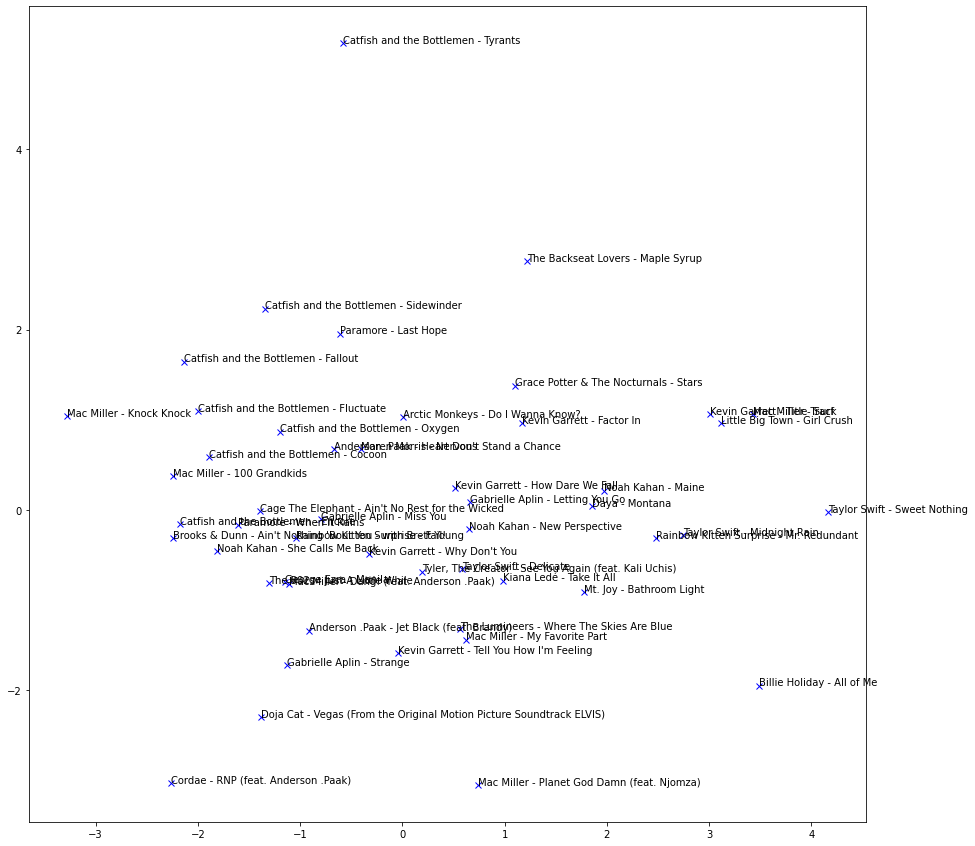

In [31]:
#Plot
plt.figure(figsize=(8, 8))
fig,ax = plt.subplots(figsize=(15,15))
x = reduced_features[:,0]
y = reduced_features[:,1]
ax.plot(x,y,"bx")
annotations = subset_features.index
for i, label in enumerate(annotations):
    ax.annotate(label, (x[i], y[i]),alpha=1)